<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Notebooks/11-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Máquinas de soporte vectorial
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; Periodo 2025-02
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado como una guía introductoria para implementar Máquinas de soporte vectorial (SVM) en Python.



Los paquetes necesarios son:

In [51]:
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización

from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.datasets import make_blobs, make_circles # Creación de datos
from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métrica de evaluación

# Algoritmo SVC
from sklearn.svm import SVC

---
## <font color='264CC7'> Ejemplo </font>

En el siguiente código, se muestra un ejemplo de cómo implementar Máquinas de soporte vectorial (SVM) en Python. Primero carguemos los datos y analicemos su estructura.

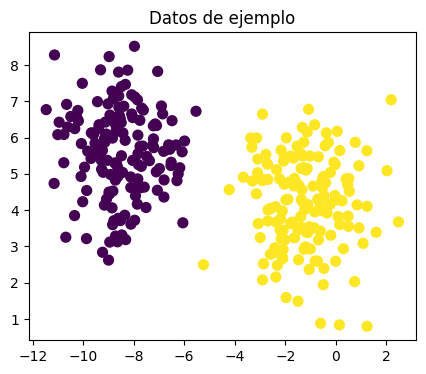

In [52]:
# Generamos los datos
X, y = make_blobs(n_samples=300, centers=2, cluster_std=1.3, random_state=7)

# Visualizar los datos
plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], s=50, c=y)
plt.title('Datos de ejemplo')
plt.show()


Dividimos los datos en los conjuntos de entrenamiento y prueba.

In [53]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamos el modelo:

In [54]:
# Crear y entrenar el modelo SVM
modelo = SVC(kernel='linear')  
modelo.fit(X_train, y_train)

SVC(kernel='linear')

Revisamos la precisión del modelo:

In [55]:
# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 1.0
Matriz de confusión:
[[31  0]
 [ 0 29]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        29

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



Podemos visualizar las regiones de decisión del modelo:

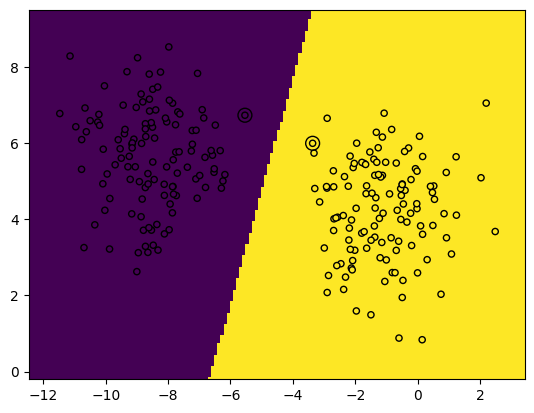

In [56]:
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import numpy as np

# Datos para el fondo
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                         np.arange(y_min, y_max, 0.1))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Crear el fondo
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z)
 
# Puntos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Soporte de los vectores
sv = modelo.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='k')

plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Aumenta la disperción de los datos de entrenamiento y observa cómo cambia la precisión del modelo.
</div>
</br>
<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Aumenta el número de centros de los datos de entrenamiento y observa cómo cambia la visualización de las regiones de decisión.
</div>

---
## <font color='264CC7'> Kernel </font>

Revisemos datos que no son linealmente separables:

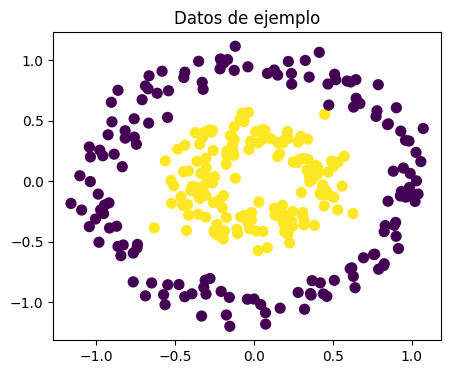

In [65]:
# Generamos los datos
X, y = make_circles(n_samples=300, factor=.4, noise=0.1, random_state=7)

# Visualizar los datos
plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], s=50, c=y)
plt.title('Datos de ejemplo')
plt.show()

Realicemos el mismo procedimiento que antes:

In [66]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo SVM
modelo = SVC(kernel='linear')  
modelo.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.57
Matriz de confusión:
[[11 21]
 [ 5 23]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.69      0.34      0.46        32
           1       0.52      0.82      0.64        28

    accuracy                           0.57        60
   macro avg       0.61      0.58      0.55        60
weighted avg       0.61      0.57      0.54        60



Visualicemos las regiones de decisión:

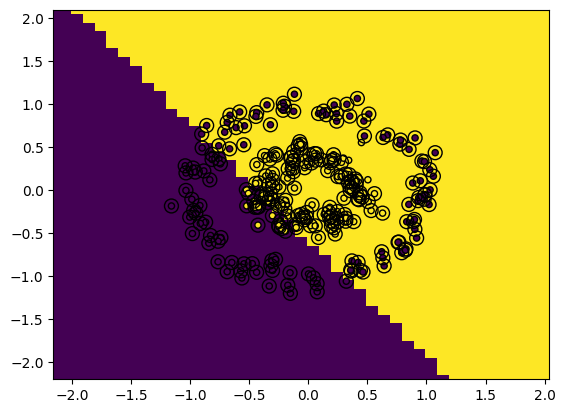

In [67]:
# Datos para el fondo
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                         np.arange(y_min, y_max, 0.1))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Crear el fondo
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z)
 
# Puntos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Soporte de los vectores
sv = modelo.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='k')

plt.show()

Apliquemos un kernel rbf:

In [72]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo SVM
modelo = SVC(kernel='rbf')
modelo.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.98
Matriz de confusión:
[[32  0]
 [ 1 27]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.96      0.98        28

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



Visualicemos las regiones de decisión:

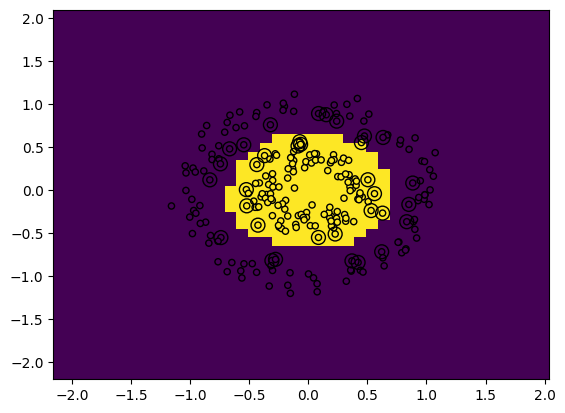

In [73]:
# Datos para el fondo
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                         np.arange(y_min, y_max, 0.1))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Crear el fondo
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z)
 
# Puntos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Soporte de los vectores
sv = modelo.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='k')

plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Pruébalo con un kernel polinómico de grado 2 y 3, y observa cómo cambia la visualización de las regiones de decisión.
</div>
</br>
<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Genera datos con la función make_moons y observa cómo cambia la visualización de las regiones de decisión con diferentes kernels.
</div>
</br>
<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Para un conjunto de datos no linealmente separable, prueba un kernel polinomial con diferentes grados; realiza un gráfico de la precisión del modelo en función del grado del kernel.
</div>

---
## <font color='264CC7'> Ejemplo práctico </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero leamos los datos y seleccionemos las columnas que utilizaremos:

In [59]:
# Leer los datos
data = pd.read_csv('https://raw.githubusercontent.com/andres-merino/AprendizajeAutomaticoInicial-05-N0105/refs/heads/main/2-Notebooks/datos/Pokemon.csv')
# Tomo las columnas de interés
numeric_cols = ['Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def', 'HP']
class_col = ['Stage']
data = data[['Name', *numeric_cols, *class_col]]
# Muestro los primeros registros
display(data.head())

,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Stage
0,Bulbasaur,49,49,45,65,65,45,1
1,Ivysaur,62,63,60,80,80,60,2
2,Venusaur,82,83,80,100,100,80,3
3,Charmander,52,43,65,60,50,39,1
4,Charmeleon,64,58,80,80,65,58,2


Revisemos los datos:

In [60]:
data.describe()

,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Stage
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,72.549669,68.225166,68.933775,67.139073,66.019868,64.211921,1.582781
std,26.596162,26.916704,26.746880,28.534199,24.197926,28.590117,0.676832
min,5.000000,5.000000,15.000000,15.000000,20.000000,10.000000,1.000000
25%,51.000000,50.000000,46.500000,45.000000,49.000000,45.000000,1.000000
50%,70.000000,65.000000,70.000000,65.000000,65.000000,60.000000,1.000000
75%,90.000000,84.000000,90.000000,87.500000,80.000000,80.000000,2.000000
max,134.000000,180.000000,140.000000,154.000000,125.000000,250.000000,3.000000


Escalemos los datos:

In [61]:
# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, 1:-1])

### <font color='264CC7'> Determinación del valor del kernel </font>

Para determinar el mejor valor de kernel, iteramos sobre los valores posibles y calculamos la precisión del modelo:

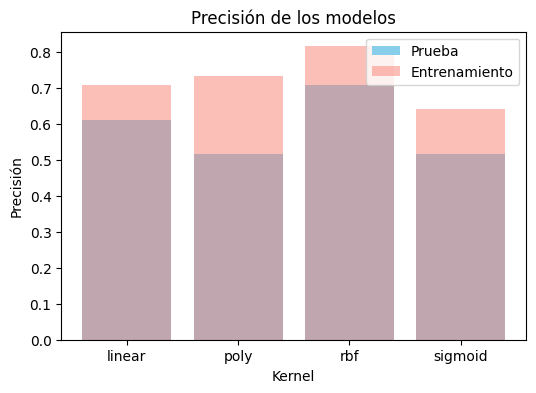

In [62]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, data['Stage'], test_size=0.2, random_state=42, stratify=data['Stage'])

# Determinar el mejor valor de k
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

# Precisión de los modelos
precisions_test = []
precisions_train = []

for kernel in kernel_values:
    modelo = SVC(kernel=kernel)
    modelo.fit(X_train, y_train)
    y_pred_test = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)
    precisions_test.append(accuracy_score(y_test, y_pred_test))
    precisions_train.append(accuracy_score(y_train, y_pred_train))

# Visualizar la precisión en función de k con barras
plt.figure(figsize=(6, 4))
plt.bar(kernel_values, precisions_test, color='skyblue')
plt.bar(kernel_values, precisions_train, color='salmon', alpha=0.5)
plt.title('Precisión de los modelos')
plt.xlabel('Kernel')
plt.ylabel('Precisión')
plt.legend(['Prueba', 'Entrenamiento'])
plt.show()


Parece que el kernel rbf es el mejor.

### <font color='264CC7'> Modelo SVM </font>

Generemos el modelo con el kernel seleccionado:

In [63]:
# Realizamos el agrupamiento
modelo = SVC(kernel='rbf')
modelo.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.71
Matriz de confusión:
[[11  5  0]
 [ 1 11  0]
 [ 0  3  0]]
Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.92      0.69      0.79        16
           2       0.58      0.92      0.71        12
           3       0.00      0.00      0.00         3

    accuracy                           0.71        31
   macro avg       0.50      0.53      0.50        31
weighted avg       0.70      0.71      0.68        31



c:\Users\aemer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aemer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aemer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,